## Breast Cancer Predictions

1. Problem 
2. Data
3. Evaluation
4. Modelling

### 1. Problem

`Experiment with the given data to be able to predict whether the tumor is benign or melignant`

Breast cancer is when breast cells mutate and become cancerous cells that multiply and form tumors. It accounts for 25% of all cancer cases and affected over 2.1 Million people in 2015 alone. Breast cancer typically affects women and people assigned female at birth (AFAB) age 50 and older, but it can also affect men and people assigned male at birth (AMAB), as well as younger women. Healthcare providers may treat breast cancer with surgery to remove tumors or treatment to kill cancerous cells.

### 2. Data 

This dataset is taken from the UCI Machine Learning Repository (Link: https://data.world/health/breast-cancer-wisconsin) by the Donor: Nick Street

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.
A few of the images can be found at
http://www.cs.wisc.edu/~street/images/

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].


This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

`The main idea and inspiration behind the upload was to provide datasets for Machine Learning as practice and reference for my peers at college. The main purpose is to analyze data and experiment with different machine learning ideas and techniques for this binary classification task. As such, this dataset is a very useful resource to practice on.

Breast cancer is when breast cells mutate and become cancerous cells that multiply and form tumors. It accounts for 25% of all cancer cases and affected over 2.1 Million people in 2015 alone. Breast cancer typically affects women and people assigned female at birth (AFAB) age 50 and older, but it can also affect men and people assigned male at birth (AMAB), as well as younger women. Healthcare providers may treat breast cancer with surgery to remove tumors or treatment to kill cancerous cells.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
A few of the images can be found at http://www.cs.wisc.edu/~street/images/

The task: To classify whether the tumor is benign (B) or malignant (M).`


### 3. Evaluation

Different metrics are gonna be used, but as this work will rely mainly on experimental nature, we will focus mostly on accuracy of prediction.

### 4. Modeling

In [12]:
# import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [6]:
# import our data
df = pd.read_csv('breast-cancer-wisconsin-data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df['diagnosis'].value_counts() # see how many values of each target category we have

B    357
M    212
Name: diagnosis, dtype: int64

In [28]:
B_M = pd.DataFrame(df['diagnosis'])
B_M

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


## Visualizing our data 

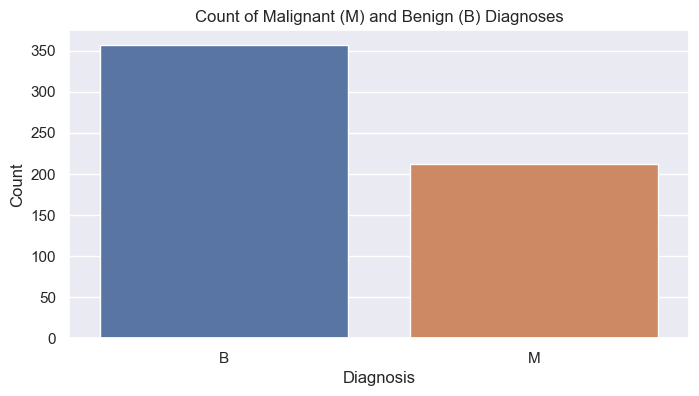

In [39]:
# Count the occurrences of each category in 'diagnosis'
diagnosis_counts = df['diagnosis'].value_counts()

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values)

# Adding title and labels
plt.title('Count of Malignant (M) and Benign (B) Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Display the plot
plt.show()

## B - benign; M - Melignant

In [11]:
df.isna().sum() # Check for empty values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Creating a training dataset

In [9]:
df_tmp = df[:280] 
df_tmp

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,8911164,B,11.89,17.36,76.20,435.60,0.12,0.07,0.06,0.07,0.20,0.06,0.64,2.29,4.02,48.84,0.01,0.01,0.01,0.02,0.03,0.00,12.40,18.99,79.46,472.40,0.14,0.08,0.07,0.09,0.22,0.06
276,8911230,B,11.33,14.16,71.79,396.60,0.09,0.04,0.00,0.00,0.20,0.06,0.24,1.28,1.56,17.09,0.01,0.01,0.00,0.00,0.02,0.00,12.20,18.99,77.37,458.00,0.13,0.07,0.00,0.01,0.28,0.06
277,8911670,M,18.81,19.98,120.90,1102.00,0.09,0.06,0.08,0.06,0.15,0.05,0.33,0.83,2.36,36.74,0.01,0.01,0.03,0.01,0.02,0.00,19.96,24.30,129.00,1236.00,0.12,0.12,0.22,0.13,0.26,0.06
278,8911800,B,13.59,17.84,86.24,572.30,0.08,0.04,0.02,0.01,0.16,0.06,0.26,1.17,1.68,22.22,0.00,0.01,0.01,0.01,0.01,0.00,15.50,26.10,98.91,739.10,0.10,0.08,0.11,0.05,0.23,0.06


In [13]:
# Create X and y
X = df_tmp.drop('diagnosis', axis=1)
y = df_tmp['diagnosis']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Test Classification models for our data
clf = LazyClassifier(verbose=0, ignore_warnings=True, predictions=True)

clf.fit(X_train, X_test, y_train, y_test)

  7%|█████▋                                                                             | 2/29 [00:00<00:01, 16.05it/s]C:\Users\pwrxn\miniconda3\envs\lazypredict\lib\site-packages\sklearn\utils\validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
C:\Users\pwrxn\miniconda3\envs\lazypredict\lib\site-packages\sklearn\utils\validation.py:73: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)
C:\Users\pwrxn\miniconda3\envs\lazypredict\lib\site-packages\sklearn\dummy.py:132: Futu

(                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  Time Taken
 Model                                                                                   
 RidgeClassifierCV                  0.98               0.98    None      0.98        0.01
 GaussianNB                         0.98               0.98    None      0.98        0.01
 KNeighborsClassifier               0.98               0.98    None      0.98        0.01
 BernoulliNB                        0.96               0.96    None      0.96        0.01
 RidgeClassifier                    0.96               0.96    None      0.96        0.01
 LinearDiscriminantAnalysis         0.96               0.96    None      0.96        2.45
 NearestCentroid                    0.96               0.96    None      0.96        0.01
 QuadraticDiscriminantAnalysis      0.95               0.95    None      0.95        0.01
 AdaBoostClassifier                 0.95               0.95    None      0.95        0.09
 NuSVC    

#### From our research we can narrow down our scope for three best performing models: 
1. RidgeClassifierCV
2. GuassianNB
3. KNeighborsClassifier

## Let's start exploring them and possibilites for their improvement

In [18]:
# First we will explore RidgeClassifierCV
from sklearn.linear_model import RidgeClassifierCV

# Define the alpha values to try
alpha_values = np.logspace(-4, 4, 20)

# Create an instance of RidgeClassifierCV with custom parameters
ridge_cv_model = RidgeClassifierCV(alphas=alpha_values, cv=5, class_weight='balanced')

# Fit the model to our data
ridge_cv_model.fit(X_train, y_train)

# Access the best alpha found
best_alpha = ridge_cv_model.alpha_
best_alpha

C:\Users\pwrxn\miniconda3\envs\lazypredict\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.24017e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\pwrxn\miniconda3\envs\lazypredict\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.10092e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\pwrxn\miniconda3\envs\lazypredict\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.56304e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\pwrxn\miniconda3\envs\lazypredict\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.62026e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\pwrxn\miniconda3\envs\lazypredict\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.45383e-23): result may not be ac

0.0001

In [34]:
ridge_score = ridge_cv_model.score(X_test, y_test)
ridge_score

0.9642857142857143

## HyperParameter Tuning Guassian Naive Bias model

In [30]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Creating a GaussianNB classifier instance
gnb = GaussianNB()

# Defining a range of var_smoothing values to try
var_smoothing_values = np.logspace(-9, -7, 100)

# Setup the grid to be searched
param_grid = {'var_smoothing': var_smoothing_values}

# Creating a GridSearchCV object
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fiting the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Best var_smoothing parameter
best_var_smoothing = grid_search.best_params_['var_smoothing']
best_var_smoothing

1.0974987654930546e-09

In [35]:
nb_score = grid_search.score(X_test, y_test)
nb_score

0.4642857142857143

## Testing KNeighborsClassifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Create KNN classifier instance
knn = KNeighborsClassifier()

# Define a range of n_neighbors values to try and other distributions for different hyperparameters
param_dist = {
    'n_neighbors': randint(1, 31), # Random integer between 1 and 30
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'p': randint(1, 3) # Random integer 1 or 2, since p is only used for Minkowski metric
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=knn, 
                                   param_distributions=param_dist, 
                                   n_iter=100, 
                                   cv=5, 
                                   scoring='accuracy', 
                                   random_state=42, 
                                   n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_
best_params

{'metric': 'manhattan', 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}

In [36]:
KN_score = random_search.score(X_test, y_test)
KN_score

0.7857142857142857

## Let's visualize our result

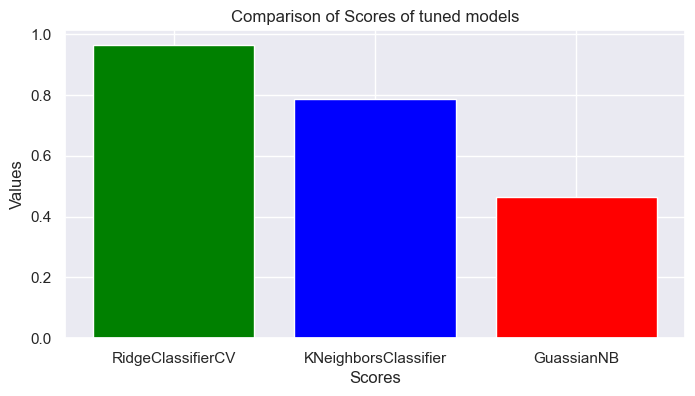

In [38]:
scores = {'RidgeClassifierCV': ridge_score,
          'KNeighborsClassifier': KN_score,
          'GuassianNB': nb_score}

labels = list(scores.keys())
scr = list(scores.values())

plt.figure(figsize=(8,4))
plt.bar(labels, scr, color=['green','blue', 'red'])

# Adding title and labels
plt.title('Comparison of Scores of tuned models')
plt.xlabel('Scores')
plt.ylabel('Values')

# Display the plot
plt.show();

## Conclusion

From our experiment on hyperparameters we can say that the best perforing model within our competition is `RidgeClassifierCV`.
We are going to continue our research using this model

## Let's create our Test data

In [40]:
test_df = df[280:]
test_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
280,8912049,M,19.16,26.60,126.20,1138.00,0.10,0.15,0.19,0.10,0.19,0.06,0.64,1.00,4.32,69.65,0.01,0.02,0.04,0.01,0.01,0.00,23.72,35.90,159.80,1724.00,0.18,0.38,0.58,0.19,0.33,0.10
281,8912055,B,11.74,14.02,74.24,427.30,0.08,0.04,0.02,0.03,0.21,0.06,0.56,1.27,3.72,37.83,0.01,0.01,0.02,0.02,0.03,0.00,13.31,18.26,84.70,533.70,0.10,0.09,0.07,0.08,0.31,0.07
282,89122,M,19.40,18.18,127.20,1145.00,0.10,0.14,0.16,0.09,0.19,0.06,0.47,1.00,2.90,53.16,0.01,0.02,0.03,0.01,0.02,0.00,23.79,28.65,152.40,1628.00,0.15,0.37,0.43,0.23,0.36,0.08
283,8912280,M,16.24,18.77,108.80,805.10,0.11,0.18,0.19,0.09,0.19,0.07,0.29,0.92,2.46,28.09,0.00,0.03,0.04,0.01,0.01,0.00,18.55,25.09,126.90,1031.00,0.14,0.47,0.50,0.17,0.28,0.11
284,8912284,B,12.89,15.70,84.08,516.60,0.08,0.10,0.11,0.03,0.14,0.06,0.29,1.39,2.35,23.29,0.01,0.04,0.08,0.02,0.02,0.00,13.90,19.69,92.12,595.60,0.10,0.23,0.33,0.10,0.20,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,0.17,0.06,1.18,1.26,7.67,158.70,0.01,0.03,0.05,0.02,0.01,0.00,25.45,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07
565,926682,M,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,0.18,0.06,0.77,2.46,5.20,99.04,0.01,0.02,0.04,0.02,0.02,0.00,23.69,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07
566,926954,M,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,0.06,0.46,1.07,3.42,48.55,0.01,0.04,0.05,0.02,0.01,0.00,18.98,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08
567,927241,M,20.60,29.33,140.10,1265.00,0.12,0.28,0.35,0.15,0.24,0.07,0.73,1.59,5.77,86.22,0.01,0.06,0.07,0.02,0.02,0.01,25.74,39.42,184.60,1821.00,0.17,0.87,0.94,0.27,0.41,0.12


## Let's test our best model - RidgeClassifierCV

In [41]:
X_test = test_df.drop('diagnosis', axis=1)
y_true = test_df['diagnosis']

y_preds = ridge_cv_model.predict(X_test) # Making predictions

In [44]:
from sklearn.metrics import accuracy_score, classification_report

# Calculating accuracy
accuracy = accuracy_score(y_true, y_preds)
print(f'Accuracy: {accuracy}')

# Detailed classification report
print(classification_report(y_true, y_preds))

Accuracy: 0.972318339100346
              precision    recall  f1-score   support

           B       0.99      0.98      0.98       219
           M       0.93      0.96      0.94        70

    accuracy                           0.97       289
   macro avg       0.96      0.97      0.96       289
weighted avg       0.97      0.97      0.97       289



## Feature Importance

In [46]:
# making a variable for the best model
best_model = RidgeClassifierCV()
best_model.fit(X_train, y_train)

RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]))

In [56]:
# Access the coefficients
coefficients = best_model.coef_[0]

# Map coefficients to feature names (assuming X_train is your feature DataFrame)
feature_names = X_train.columns
feature_importances = dict(zip(feature_names, coefficients))

# Display feature importances
for feature, importance in feature_importances.items():
    print(f"{feature}: {importance}")

id: 2.9802322387695312e-06
radius_mean: -0.04827513271404804
texture_mean: 0.018013780606635166
perimeter_mean: -0.024481283230301187
area_mean: 0.0012590416463353904
smoothness_mean: 0.984588616021496
compactness_mean: -1.2141455161234944
concavity_mean: 0.4738753072966808
concave points_mean: 1.2700997131716898
symmetry_mean: -0.7809428118969873
fractal_dimension_mean: 0.18701748182388708
radius_se: 0.7195274682372166
texture_se: 0.010744266750335019
perimeter_se: -0.02222023708695886
area_se: -0.0008259499896610123
smoothness_se: 0.49853771628543214
compactness_se: 0.3602196415492361
concavity_se: -1.1917803647673157
concave points_se: 0.271873819269645
symmetry_se: -0.17663106512832186
fractal_dimension_se: 0.02972255673396553
radius_worst: 0.3967886320887324
texture_worst: 0.019026815088018623
perimeter_worst: 0.013605968585039818
area_worst: -0.0029940709537186194
smoothness_worst: 2.5730590335634442
compactness_worst: -0.15424551825100918
concavity_worst: 0.46235986371551674
con

## Let's visualize them

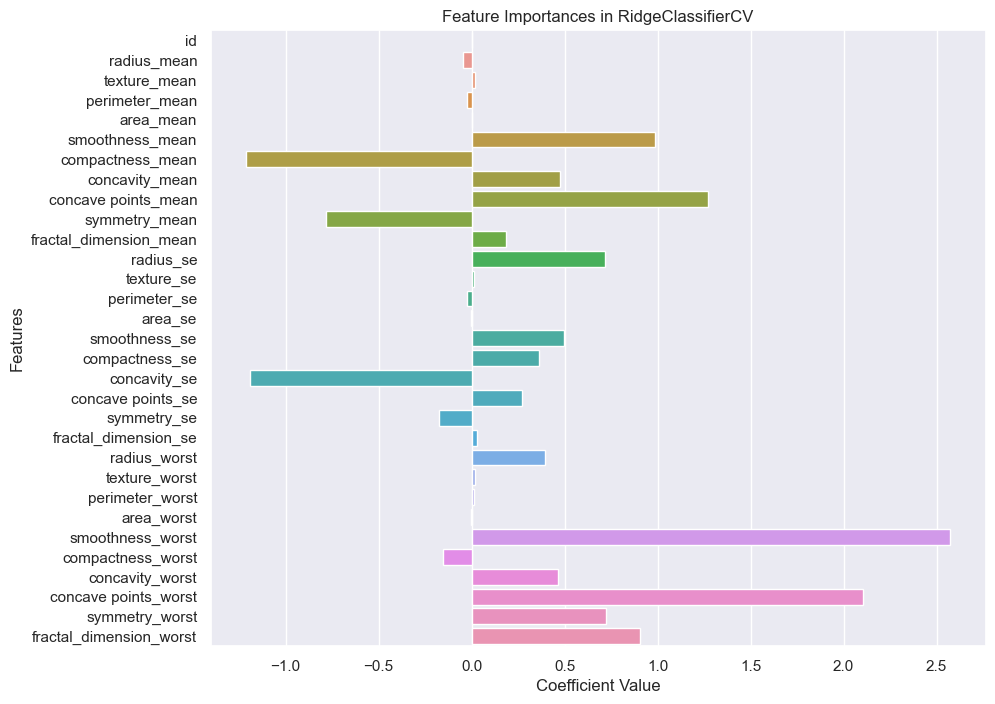

In [64]:
coefficients = best_model.coef_[0]
feature_names = X_train.columns
feature_importances = dict(zip(feature_names, coefficients))

# Converting the feature_importances dictionary to lists for plotting
features, importances = zip(*feature_importances.items())

features = list(features)
importances = list(importances)

# Creating a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=importances, y=features)

# Adding title and labels
plt.title('Feature Importances in RidgeClassifierCV')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

# Displaying the plot
plt.show();